* 성별(sex) 바이너리 : ‘F’ - 여성 또는 ‘M’ - 남성
* 나이(age) 숫자: 15 - 22
* 부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 ‘A’: 별거
* 엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육
* 아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육
* 주보호자(guardian) 명목형 : ‘어머니’, ‘아버지’ 또는 ‘기타’
* 등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 - 30분, 3 : 30분 - 1시간, 4 : 1시간 이상
* 학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2-5시간, 3 : 5-10시간, 4 : 10시간이상
* 학고횟수(failures) 숫자 : 1, 2, 3 else 4
* 자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)
* 가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)

In [1]:
# 다중 회귀 분석
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem1.csv')
df.head()

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4


## 다음 데이터를 탐색적으로 분석하고 시각화 하시오

In [2]:
'''
1-1. 데이터는 총 12개의 변수로 되어 있는데 이 중, absenses는 타겟변수, 나머지는 예측 변수로 판단된다
데이터의 크기는 395개이며, age, traveltime, freetime은 소수의 결측치를 가지고 있다.
데이터 타입과 컬럼 정의서를 근거하여 판단해보면, age와 absences는 양적 변수, 나머지
변수들은 범주형 변수로 볼 수 있다. 비록 어떤 변수들은 수치로 되어 있어서 양적 변수처럼 보이지만
범주형 변수이며 이 중, Medu,Fedu,traveltime,studytime,failures,freetime,famrel은 순서의 정보를 가지는 순위변수이다. 
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


In [6]:
'''
수치형 변수인 age와 absences의 기술통계는 다음과 같다.
age의 데이터 개수는 392개이고, 평균값은 16.7이며 1/2/3 사분위 수는 각각 16,17,18이다.
absences의 데이터 개수는 395개이고, 평균값은 5.71이며, 1/2/3 사분위수는 각각 0,4,8이다.
'''  
df[['age','absences']].describe()

,age,absences
count,392.000000,395.000000
mean,16.698980,5.708861
std,1.279865,8.003096
min,15.000000,0.000000
25%,16.000000,0.000000
50%,17.000000,4.000000
75%,18.000000,8.000000
max,22.000000,75.000000


In [9]:
'''
범주형 변수들의 데이터 타입을 'category'로 변경한 후, 아래와 같이 기술통계 결과를 얻었다. 
각 데이터의 개수와 수준의 개수(unique), 빈도가 가장 많은 수준(top)과 그 수준의 빈도(freq)를
아래와 같이 확인할 수 있다. 모든 변수들이 5개 이하의 수준을 f가지고 있으며, 수치로 표현된 
Fedu, Medu, studytime, traveltime, failures, famrel, freetime의 변수들은 순서 정보도 포함하고 있다.
'''
cat_df = df.drop(['age','absences'], axis = 1).astype('category')
cat_df.describe()

,sex,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime
count,395,395,395,395,395,395,392.0,395,395,390.0
unique,2,2,5,5,3,4,4.0,4,5,5.0
top,F,T,2,4,mother,2,1.0,0,4,3.0
freq,208,354,115,131,273,198,255.0,312,195,153.0


[히스토그램]


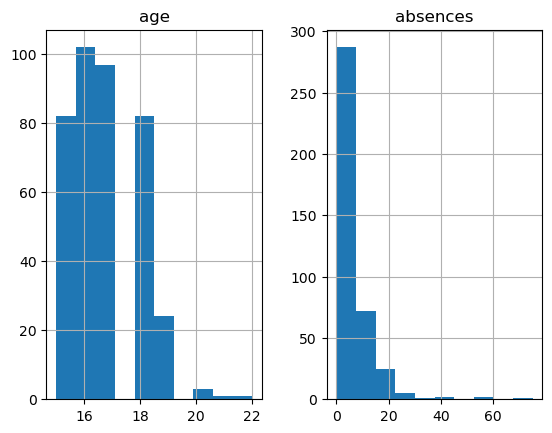

[왜도]
age         0.46
absences    3.67
dtype: float64 

[첨도]
age         -0.02
absences    21.72
dtype: float64 

[상자그림]


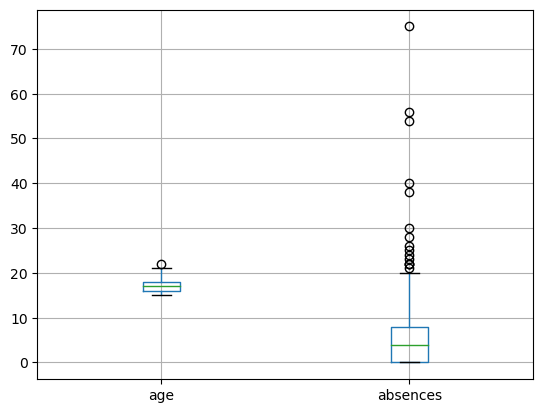

In [12]:
'''
양적 변수와 질적 변수의 데이터 시각화 방법은 차이가 있기 때문에 아래와 같이 각각 시각화를 진행하고자 한다. 
먼저 양적 변수인 age,absences에 대하여, 히스토그램, 상자그림을 통해 시각화 한 결과는 다음과 같다.
'''
from matplotlib import pyplot as plt

'''
age와 absences의 히스토그램을 통해 두 데이터가 모두 왼쪽으로 쏠려있고, 오른쪽 꼬리를 가지는 형태의 데이터를 가짐을 알 수 있다. 
왜도와 첨도를 살펴보면, 정규 분포의 왜도가 0, 첨도가 3인 것을 비교해볼 때, age는 왜도 0.46, 첨도 -0.02이고 absences는 왜도 3.67, 첨도 21.72임을 알 수 있다.
'''
print('[히스토그램]')
df[['age','absences']].hist()
plt.show()

print('[왜도]')
print(df[['age','absences']].skew().round(2),'\n')
print('[첨도]')
print(df[['age','absences']].kurt().round(2),'\n')

'''
age와 absences의 상자그림을 통해 두 변수 모두 이상치를 가지고 있음을 확인하였고, 
특히 absences의 경우, 비교적 범위가 넓으며 중앙값과 이상치의 차이가 매우 큼을 알 수 있다.
''' 
print('[상자그림]')
df[['age','absences']].boxplot()
plt.show()

[막대그래프]


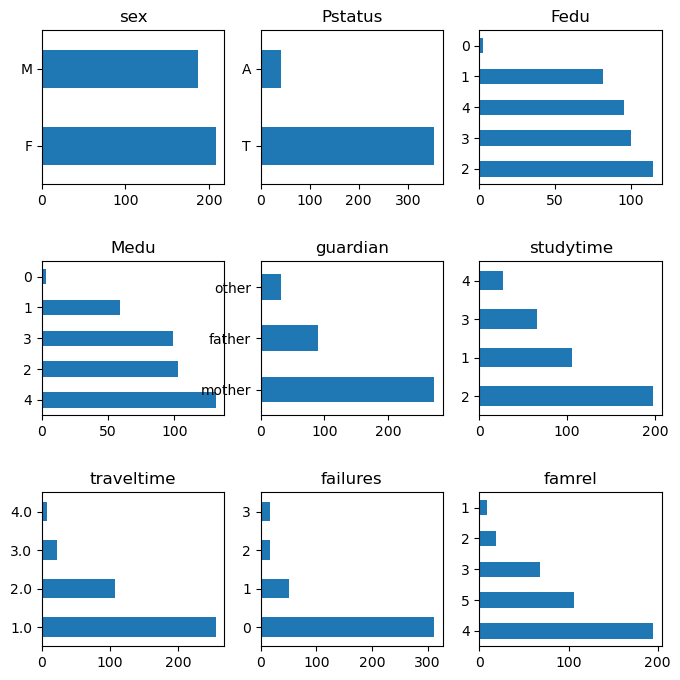

In [13]:
'''
질적 변수들은 막대 그래프와 파이 그래프로 시각화 할 수 있으며, 그 결과는 다음과 같다. 
'''
print("[막대그래프]")
fig, axes = plt.subplots(3,3, figsize = (8,8))
plt.subplots_adjust(hspace = 0.5)
for feature, ax in zip(cat_df.columns, axes.ravel()):
    cat_df[feature].value_counts().plot.barh(ax = ax)
    ax.set_title(feature)
plt.show()

[파이그래프]


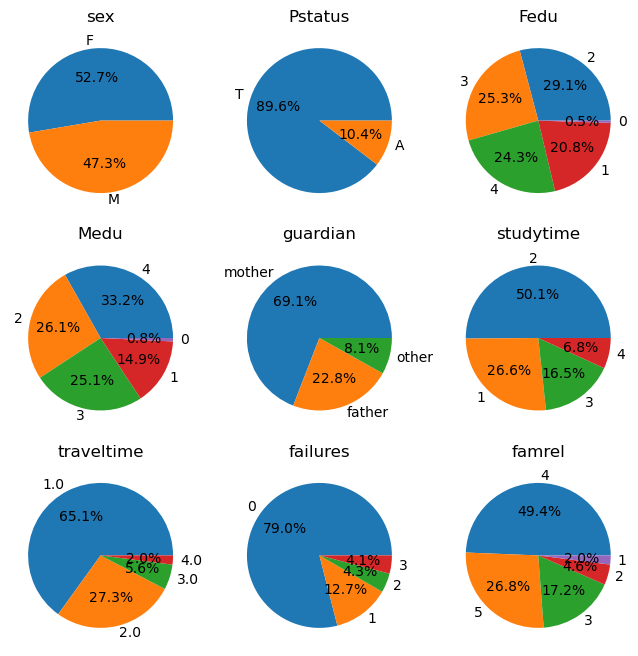

In [15]:
print('[파이그래프]')
fig, axes = plt.subplots(3,3,figsize = (8,8))
plt.subplots_adjust(hspace = 0.2)
for feature, ax in zip(cat_df.columns, axes.ravel()):
    table = cat_df[feature].value_counts()
    ax.pie(table.values, labels = table.index, autopct = "%.1f%%")
    ax.set_title(feature)
plt.show()

## 1.2) 다음 데이터의 결측치를 처리하고 그 변화를 시각화하시오. 추가적인 전처리가 필요하다면 그 전처리에 대한 설명과 이유, 기대효과를 설명하시오.

결측치 
 sex           0
age           3
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    3
failures      0
famrel        0
freetime      5
absences      0
dtype: int64


<BarContainer object of 12 artists>

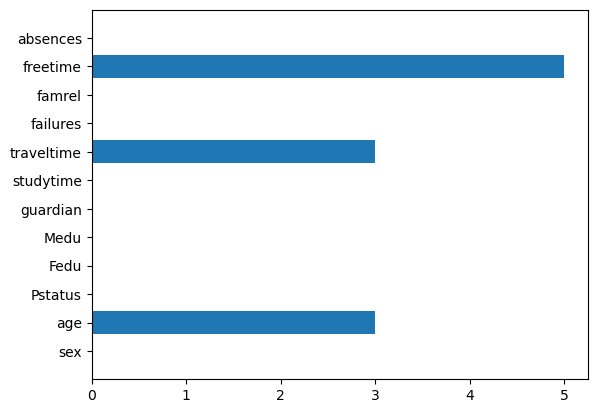

In [26]:
# 먼저 결측치를 수평막대 그래프로 시각화를 해본다.
print('결측치 \n',df.isnull().sum())
missing_data = df.isnull().sum()
plt.barh(missing_data.index, missing_data.values)

[결측값]
 sex           0
age           0
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    0
failures      0
famrel        0
freetime      0
absences      0
dtype: int64


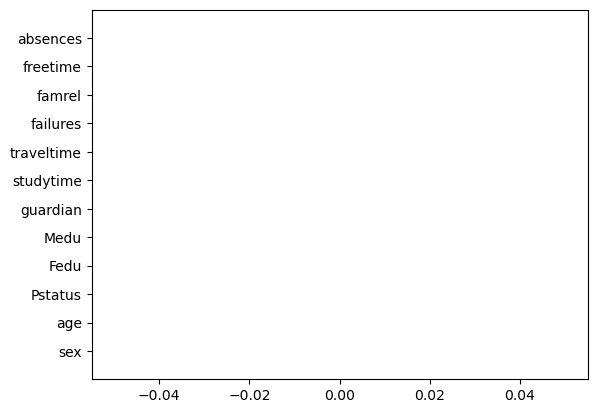

In [29]:
'''
결측치를 갖는 feature는 age, traveltime, freetime이다. 세 개의 변수 모두 대푯값을 채우는 방법으로 
결측치를 처리하고자 한다. 양적 변수인 age는 평균값으로, 질적변수인 traveltime과 freetime은 최빈값으로 결측치를 채우고자 한다.
아래 시각화 결과를 보면 결측치가 완전히 없어졌음을 알 수 있다. 
'''

df['age'].fillna(df['age'].mean(),inplace = True)
df['traveltime'] = cat_df['traveltime'].describe()['top']
df['freetime'] = cat_df['freetime'].describe()['top']

missing_data = df.isnull().sum()
plt.barh(missing_data.index, missing_data.values)

print('[결측값]\n',missing_data)
plt.show()

'''
추가적인 전처리로 absences의 이상치를 처리하는 방법이 있다. 이상치가 있으면 변수들 사이의 보편적인 관계가 왜곡되어 
잘못된 학습 결과를 얻을 수 있기 때문이다. 이상치를 처리하는 방법으로는 극단값을 절단하는 방법, 조정, 클리핑 등이 있는데 해당 경우에는
데이터의 크기가 작기 때문에 데이터 소실을 막기위해 조정의 방법이 가장 적합할 것으로 생각한다. 
'''